<a href="https://colab.research.google.com/github/AMANKHURANA17/weed-detection/blob/main/weed_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WEED DETECTION USING DEEP LEARNING**

Tools used :

*   Google Collaboratory
*   Scikit-Learn
*  Tensorflow
*  Numpy
*   seaborn
*   Matplotlib


TechStack : Python


In [ ]:
# importing required libraries


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

from tqdm import tqdm
import glob
import seaborn as sns
import cv2
import io

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
import ipywidgets as widgets
from tensorflow.keras.utils import to_categorical

# architecture Pare
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# labels of various categories in the  dataset

In [ ]:
labels = ["broadleaf", "grass", "soil", "soybean"]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing dataset from the google drive and converting the each image into (227 X 227) pixels

In [ ]:
X  =[]
Y = []
image_size = (227, 227)

for i in labels:
    Datasetspath = "/content/drive/MyDrive/dataset/dataset/" + i + "/"
    print(Datasetspath)
    fileRead = glob.glob(Datasetspath + "*")
    print(len(fileRead))

    for file in fileRead:
        image = cv2.imread(file)
        img = cv2.resize(image, image_size)
        X.append(img)
        Y.append(i)
X = np.array(X)
Y = np.array(Y)

/content/drive/MyDrive/dataset/dataset/broadleaf/
1191
/content/drive/MyDrive/dataset/dataset/grass/
3520
/content/drive/MyDrive/dataset/dataset/soil/
3249
/content/drive/MyDrive/dataset/dataset/soybean/
7376


Observations

*  There are around 15,000 images that are provided in the dataset .

*  There are 4  labelled categories  i.e soil , grass , broadleaf , soybean .

*  The proportion of the category "Soybean" is the highest .


In [ ]:
# printing the dataset path of the random images

In [ ]:
for i in labels:
    Datasetspath = "/content/drive/MyDrive/dataset/dataset/" + i + "/"
    print(Datasetspath)
    fileRead = glob.glob(Datasetspath + "*")
    print(fileRead[1])
#     break

/content/drive/MyDrive/dataset/dataset/broadleaf/
/content/drive/MyDrive/dataset/dataset/broadleaf/1158.tif
/content/drive/MyDrive/dataset/dataset/grass/
/content/drive/MyDrive/dataset/dataset/grass/3261.tif
/content/drive/MyDrive/dataset/dataset/soil/
/content/drive/MyDrive/dataset/dataset/soil/3017.tif
/content/drive/MyDrive/dataset/dataset/soybean/
/content/drive/MyDrive/dataset/dataset/soybean/6729.tif


In [ ]:
# input variables taken for training model

In [ ]:
X.shape, Y.shape


((15336, 227, 227, 3), (15336,))

 *   It is evident that X variable contains all (227 X 227) pixels images with 3 channels of red , blue , green  color .

*   'Y' variable is containing all the labels of the images in it as single column .


In [ ]:
# plotting the image having dimension in format (227 X 227 X 3)

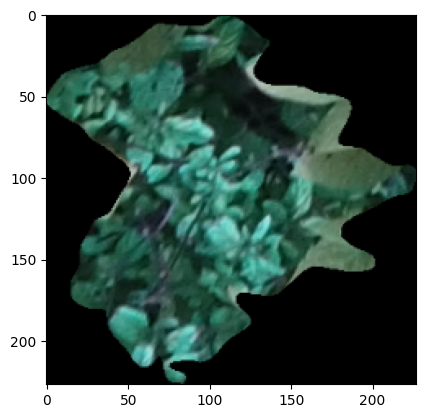

In [ ]:
plt.imshow(X[0])


In [ ]:
# printing the lable for the above image
print(Y[0])


broadleaf


In [ ]:
# Label encoding for the y input

In [ ]:
Temp_y = []
for i in Y:
    Temp_y.append(labels.index(i))
Y = to_categorical(Temp_y)
Y[0]

array([1., 0., 0., 0.], dtype=float32)

In [ ]:
Y.shape


(15336, 4)

#### Splitting Dataset into training and test

In [ ]:
# test size is taken as 30% while the training size is 70% of dataset

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=101)

In [ ]:
X_train.shape, Y_train.shape


((10735, 227, 227, 3), (10735, 4))

In [ ]:
X_test.shape, Y_test.shape


((4601, 227, 227, 3), (4601, 4))

## ALEX NET MODEL

*   It is a very popular model for classification of various categories

*   It has 5 convolutional layers and 3 max pooling layer

*  The input layer is followed by 2 hidden dense layers and 1 output layer .

*  All this layers have fixed parameters including filter size , no of filters , no . of neurons , padding etc .





**Architecture for the model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D, Dense, Conv2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout


In [ ]:
models = Sequential()


#1st Conv2D Layer
models.add(Conv2D(96, kernel_size = (11, 11), strides = (4, 4),
                 padding = "valid", activation  = 'relu', input_shape = (227, 227, 3)))
models.add(MaxPooling2D(pool_size = (3, 3),
                       strides = (2, 2), padding = "valid",
                       data_format = None))



#2nd Conv2D Layer

models.add(Conv2D(256, kernel_size = (5, 5), strides = 1,
                 padding = "same", activation  = 'relu'))

models.add(MaxPooling2D(pool_size = (3, 3),
                       strides = (2, 2), padding = "valid",
                       data_format = None))




#3rd Conv2D Layer
models.add(Conv2D(384, kernel_size = (3, 3), strides = 1,
                 padding = "same", activation  = 'relu'))



#4th Conv2D Layer
models.add(Conv2D(384, kernel_size = (3, 3), strides = 1,
                 padding = "same", activation  = 'relu'))


#5th Conv2D Layer

models.add(Conv2D(256, kernel_size = (3, 3), strides = 1,
                 padding = "same", activation  = 'relu'))

models.add(MaxPooling2D(pool_size = (3, 3),
                       strides = (2, 2), padding = "valid",
                       data_format = None))


# Flatten Layer
models.add(Flatten())

models.add(Dense(4096, activation = 'relu')) # Hidden layer 1
models.add(Dense(4096, activation = 'relu')) # Hidden layer 2
models.add(Dense(4, activation = 'softmax')) # output layer


In [ ]:
models.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 384)       1

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)


In [ ]:
models.compile(loss = "categorical_crossentropy",
             optimizer = optimizer,
             metrics = ["accuracy"])


In [ ]:
history = models.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 4, batch_size = 2, verbose = 1)


Epoch 1/4
5368/5368 [==============================] - 147s 26ms/step - loss: 0.9373 - accuracy: 0.6424 - val_loss: 0.5669 - val_accuracy: 0.7066
Epoch 2/4
5368/5368 [==============================] - 136s 25ms/step - loss: 0.5122 - accuracy: 0.8147 - val_loss: 0.3416 - val_accuracy: 0.8683
Epoch 3/4
5368/5368 [==============================] - 136s 25ms/step - loss: 0.4102 - accuracy: 0.8551 - val_loss: 0.3710 - val_accuracy: 0.8652
Epoch 4/4
5368/5368 [==============================] - 136s 25ms/step - loss: 0.3497 - accuracy: 0.8780 - val_loss: 0.3756 - val_accuracy: 0.8629


Model Accuracy



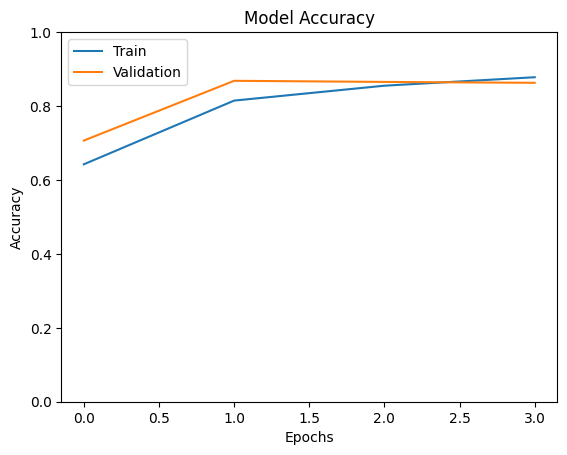

In [ ]:
ax = plt.gca()
ax.set_ylim([0, 1])
print("Model Accuracy\n")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

Model Loss



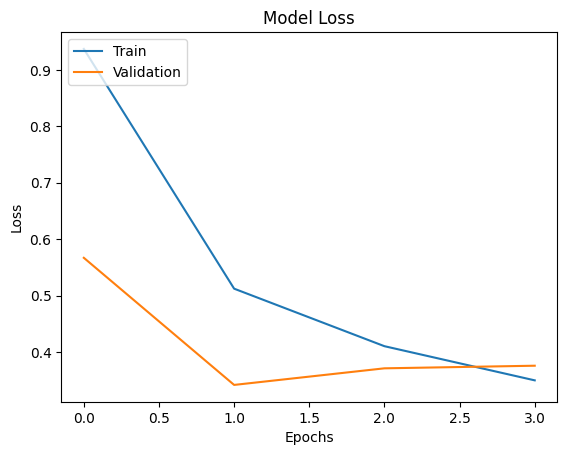

In [ ]:
ax = plt.gca()
# ax.set_ylim([0, 1])
print("Model Loss\n")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# **RESNET Model**

In [ ]:
import cv2
import numpy as np
from keras.models import load_model

"""

# Function to preprocess image
def preprocess_image(image_path):
    # Read image
    image = cv2.imread(image_path)
    # Resize image to match input shape of the model
    image = cv2.resize(image, (227, 227))
    # Normalize pixel values to be in the range [0, 1]
    image = image.astype("float") / 255.0
    # Add batch dimension
    image = np.expand_dims(image, axis=0)
    return image

# Function to make prediction
def predict(image_path):
    # Preprocess the image
    image = preprocess_image(image_path)
    # Perform prediction
    prediction = models.predict(image)
    # Get the predicted class label
    predicted_class_index = np.argmax(prediction)
    predicted_class = labels[predicted_class_index]
    # Get the probability score
    probability = prediction[0][predicted_class_index]
    return predicted_class, probability

# List of image paths
image_paths = ["image1.jpg", "image2.jpg", "image3.jpg", "image4.jpg", "image5.jpg", "image6.jpg", "image7.jpg", "image8.jpg"]

# Predict for each image
for image_path in image_paths:
    # Perform prediction
    predicted_class, probability = predict(image_path)
    # Display the prediction
    print("Image:", image_path)
    print("Predicted class:", predicted_class)
    print("Probability:", probability)
    print()
"""

'\n\n# Function to preprocess image\ndef preprocess_image(image_path):\n    # Read image\n    image = cv2.imread(image_path)\n    # Resize image to match input shape of the model\n    image = cv2.resize(image, (227, 227))\n    # Normalize pixel values to be in the range [0, 1]\n    image = image.astype("float") / 255.0\n    # Add batch dimension\n    image = np.expand_dims(image, axis=0)\n    return image\n\n# Function to make prediction\ndef predict(image_path):\n    # Preprocess the image\n    image = preprocess_image(image_path)\n    # Perform prediction\n    prediction = models.predict(image)\n    # Get the predicted class label\n    predicted_class_index = np.argmax(prediction)\n    predicted_class = labels[predicted_class_index]\n    # Get the probability score\n    probability = prediction[0][predicted_class_index]\n    return predicted_class, probability\n\n# List of image paths\nimage_paths = ["image1.jpg", "image2.jpg", "image3.jpg", "image4.jpg", "image5.jpg", "image6.jpg", 

In [ ]:
!pip install pydot


In [ ]:
import numpy as np
import cv2
import glob
import random

# Set the desired total number of images
total_images = 6000

# Initialize lists for images (X) and their labels (Y)
X = []
Y = []

# Set the target size for the images after resizing
image_size = (227, 227)

# Calculate the number of images per class based on the total number of images
num_images_per_class = total_images // len(labels)

# Iterate over each label
for label in labels:
    # Construct the path for the current label's dataset
    dataset_path = "/content/drive/MyDrive/dataset/dataset/" + label + "/"

    # Get a list of all files in the dataset directory for this label
    files = glob.glob(dataset_path + "*")

    # Shuffle the files randomly
    random.shuffle(files)

    # Select a subset of files equal to num_images_per_class
    files = files[:num_images_per_class]

    # Iterate over selected files
    for file in files:
        # Read the image using OpenCV
        image = cv2.imread(file)

        # Resize the image
        img = cv2.resize(image, image_size)

        # Append the resized image to X
        X.append(img)

        # Append the label to Y
        Y.append(label)

# Convert lists to NumPy arrays
X = np.array(X)
Y = np.array(Y)

# Now you have X and Y containing the images and their corresponding labels


In [ ]:
for i in labels:
    Datasetspath = "/content/drive/MyDrive/dataset/dataset/" + i + "/"
    print(Datasetspath)
    fileRead = glob.glob(Datasetspath + "*")
    print(fileRead[1])
#     break

/content/drive/MyDrive/dataset/dataset/broadleaf/
/content/drive/MyDrive/dataset/dataset/broadleaf/1158.tif
/content/drive/MyDrive/dataset/dataset/grass/
/content/drive/MyDrive/dataset/dataset/grass/3261.tif
/content/drive/MyDrive/dataset/dataset/soil/
/content/drive/MyDrive/dataset/dataset/soil/3017.tif
/content/drive/MyDrive/dataset/dataset/soybean/
/content/drive/MyDrive/dataset/dataset/soybean/6729.tif


In [ ]:
Temp_y = []
for i in Y:
    Temp_y.append(labels.index(i))
Y = to_categorical(Temp_y)
Y[0]

array([1., 0., 0., 0.], dtype=float32)

In [ ]:
X.shape, Y.shape


((5691, 227, 227, 3), (5691, 4))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=101)

In [ ]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from tensorflow.keras.utils import plot_model
from keras.utils import plot_model

from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow

from keras.initializers import glorot_uniform
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

In [ ]:
# x is input, y=F(x)
# identity block simply means input should be equal to output.
#  y = x + F(x)   the layers in a traditional network are learning the true output H(x)
# F(x) = y - x   the layers in a residual network are learning the residual F(x)
# Hence, the name: Residual Block.



def identity_block(X, f, filters, stage, block):
    """

    Arguments:
    X -- input of shape (m, height, width, channel)
    f -- shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network

    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """

    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Saving the input value.we need this later to add to the output.
    X_shortcut = X

    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)


    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)


    return X

In [ ]:

def convolutional_block(X, f, filters, stage, block, s = 2):

    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value
    X_shortcut = X


    # First layer
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a')(X) # 1,1 is filter size
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)  # normalization on channels
    X = Activation('relu')(X)


    # Second layer  (f,f)=3*3 filter by default
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)


    # Third layer
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)


    ##### SHORTCUT PATH ####
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '1')(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value here, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)


    return X

In [ ]:
#Each ResNet block is either 2 layer deep
def ResNet50(input_shape=(227, 227, 3), classes=4):
    """
    Implementation of the ResNet50 architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    """

    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input) #3,3 padding

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(X) #64 filters of 7*7
    X = BatchNormalization(axis=3, name='bn_conv1')(X) #batchnorm applied on channels
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X) #window size is 3*3

    # Stage 2
    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    # convolutional_block is a function defined above. Convolutional_block have 3 layers.
    #filters=[64, 64, 256] first 64 is for 1st layer and 2nd 64 is for 2nd layer and 256 is for 3rd layer of convultional block
    # below are the conv layers from convolutional_block function
    #X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a')(X)
    #X = Conv2D(F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    #X = Conv2D(F3, (1, 1), strides = (s,s), name = conv_name_base + '2a')(X)

    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    #X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(X)
    #X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    #X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)

    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')
    #X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(X)
    #X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    #X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)


    ### START CODE HERE ###

    # Stage 3
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL
    X = AveragePooling2D((2,2), name="avg_pool")(X)

    ### END CODE HERE ###

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)


    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model
model = ResNet50()


In [ ]:
model = ResNet50(input_shape = ( 227, 227, 3), classes = 4)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 227, 227, 3)]        0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 233, 233, 3)          0         ['input_3[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1 (Conv2D)              (None, 114, 114, 64)         9472      ['zero_padding2d_2[0][0]']    
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 114, 114, 64)         256       ['conv1[0][0]']        

In [ ]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 4, batch_size = 2, verbose = 1)


Epoch 1/4
1992/1992 [==============================] - 152s 61ms/step - loss: 2.0307 - accuracy: 0.4311 - val_loss: 0.9180 - val_accuracy: 0.5187
Epoch 2/4
1992/1992 [==============================] - 114s 57ms/step - loss: 0.9240 - accuracy: 0.5518 - val_loss: 1.2748 - val_accuracy: 0.4350
Epoch 3/4
1992/1992 [==============================] - 115s 58ms/step - loss: 0.7844 - accuracy: 0.6420 - val_loss: 1.0004 - val_accuracy: 0.5867
Epoch 4/4
1992/1992 [==============================] - 114s 57ms/step - loss: 0.7782 - accuracy: 0.6467 - val_loss: 3.4641 - val_accuracy: 0.4707


Model Accuracy



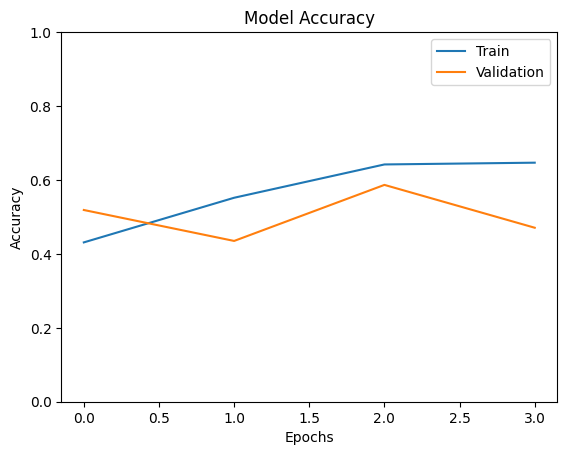

In [ ]:
ax = plt.gca()
ax.set_ylim([0, 1])
print("Model Accuracy\n")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

Model Loss



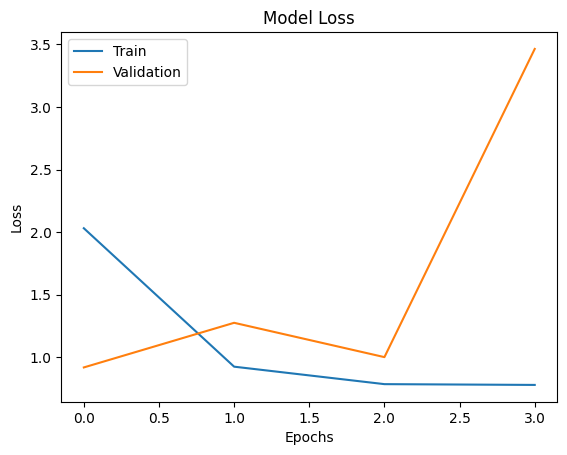

In [ ]:
ax = plt.gca()
# ax.set_ylim([0, 1])
print("Model Loss\n")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()